In [1]:
for i in range(4):
    for j in range(4):
        if j > i:
            break
        print ((i, j))
        
# Comments

(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


In [4]:
for i in range(4):
    print (i)

0
1
2
3


In [7]:
x = 256
total = 0
while x>0:
    if total > 500:
        break
    total += x
    x = x//2
    print ("total:", total)
    print ("x:", x)

total: 256
x: 128
total: 384
x: 64
total: 448
x: 32
total: 480
x: 16
total: 496
x: 8
total: 504
x: 4


## Compare "append" and "extend" 

In [23]:
all_data = [['Joheeeen', 'Emeeeeily', 'Michael', 
             'Mary', 'Steven'],
            ['Maria', 'Emily', 'Javier', 
             'Natalia', 'Pilar']]
names_of_interest = []

for names in all_data:
    enough_es = [name for name in names if name.count('e')>2]
    names_of_interest.append(enough_es)

In [25]:
names_of_interest

[['Joheeeen', 'Emeeeeily'], []]

In [27]:
all_data = [['Joheeeen', 'Emeeeeily', 'Michael', 
             'Mary', 'Steven'],
            ['Maria', 'Emily', 'Javier', 
             'Natalia', 'Pilar']]
names_of_interest = []

for names in all_data:
    enough_es = [name for name in names if name.count('e')>2]
    names_of_interest.extend(enough_es)

In [28]:
# As we can see, the main difference between 
names_of_interest

['Joheeeen', 'Emeeeeily']

## Handle errors and exceptions gracefully

In [43]:
# Convert this x into float, so if x is the number related string then 
# we can do it, but if it's pure word-related strings then no.
def attempt_float_value(x):
    try:
        return float(x)
#         print ("This is a float: ", x)
    except ValueError:
        print ("I am suppressing the ValueError, but still gotta say that This is not a float! ")
        return x

In [44]:
attempt_float_value(1.6)

1.6

In [45]:
# This is a ValueError:
attempt_float_value("test")

I am suppressing the ValueError, but still gotta say that This is not a float! 


'test'

In [61]:
def attempt_float_type_and_value(x):
    try:
        return float(x)
    except (TypeError, ValueError):
        print ("I am suppressing the error, but still gotta say that This is not a float! ", x)
        return x

In [52]:
attempt_float_type_and_value("test")

I am suppressing the error, but still gotta say that This is not a float!  test


'test'

In [53]:
attempt_float_type_and_value(['1'])

I am suppressing the error, but still gotta say that This is not a float!  ['1']


['1']

### Use of finally

In [59]:
# Let's execute whether the try gets blocked or not

x = "Still execute"
try:
    float(x)
finally:
    print (x)

Still execute


ValueError: could not convert string to float: 'Still execute'

In [74]:
# Original standard version will look like this:

x = "Test words"

# 1. Normally will want to execute this,
try:
    float(x)
# 2. If the error happens, what will this block of code do:
except:
    print ("Error! Cannot convert")
# 3. 
else:
    print ("No error! The converted float is: ", x)

Error! Cannot convert


In [67]:
try:
    fh = open("testfile", "w")
    fh.write("这是一个测试文件，用于测试异常!!")
except IOError:
    print("Error: 没有找到文件或读取文件失败")
else:
    print("内容写入文件成功")
    fh.close()

内容写入文件成功


In [79]:
# We can diretly run the py code using the %run magic function.
%run /Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/alphalens/alphalens/10_20_testing_run_code.py

Testing - Using magic run to run code.


## Files and the Operating System

In [89]:
path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/alphalens/alphalens/10_20_testing_run_code.txt"

### Method 1 of opening files: use "open"

In [90]:
f = open(path)

In [91]:
print (f)

<_io.TextIOWrapper name='/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/alphalens/alphalens/10_20_testing_run_code.txt' mode='r' encoding='UTF-8'>


In [92]:
for line in f:
    print(line)

Testing - Using magic run to run code.

“Test line 2”

“Test line 3”

“Test line 4”

“Test line 5”


In [93]:
# If we use 'open' function to open the file, then we will need to 
# close it explicitly.
f.close()

### Method 2 of opening files: use "with"

In [94]:
# This diff is that with will automatically close the file without using
# f.close
with open(path) as f:
    lines = [x.rstrip() for x in f]

In [95]:
lines

['Testing - Using magic run to run code.',
 '“Test line 2”',
 '“Test line 3”',
 '“Test line 4”',
 '“Test line 5”']

### Write text to a file

In [96]:
with open('tmp.txt', 'w') as handle:
    handle.writelines(x for x in open(path) if len(x) > 1)

In [98]:
with open('tmp.txt', 'w') as handle:
    # Here x means all words in each row as the 
    # iteration goes
    handle.writelines(x for x in open(path))
    for x in open(path):
        print (len(x))

39
14
14
14
13


In [100]:
# This code shows where there's a new line, 
# indicated by \n
with open('tmp.txt') as f:
    lines = f.readlines()

In [101]:
lines

['Testing - Using magic run to run code.\n',
 '“Test line 2”\n',
 '“Test line 3”\n',
 '“Test line 4”\n',
 '“Test line 5”']

In [104]:
with open("tmp.txt", 'rb') as f:
    data = f.read()
data

b'Testing - Using magic run to run code.\n\xe2\x80\x9cTest line 2\xe2\x80\x9d\n\xe2\x80\x9cTest line 3\xe2\x80\x9d\n\xe2\x80\x9cTest line 4\xe2\x80\x9d\n\xe2\x80\x9cTest line 5\xe2\x80\x9d'

In [105]:
# Decode the bytes to the string object
data.decode("utf8")

'Testing - Using magic run to run code.\n“Test line 2”\n“Test line 3”\n“Test line 4”\n“Test line 5”'

# Chapter 4. NumPy Basics: Arrays and Vectorized Computation

In [106]:
import numpy as np

In [107]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [108]:
%time for _ in range(10): my_arr2 = my_arr*2

CPU times: user 13.3 ms, sys: 6.55 ms, total: 19.8 ms
Wall time: 19.3 ms


In [109]:
%time for _ in range(10): my_list2 = [x*2 for x in my_list]

CPU times: user 579 ms, sys: 175 ms, total: 754 ms
Wall time: 796 ms


In [116]:
%time my_arr2 = my_arr*2

CPU times: user 3.43 ms, sys: 3.92 ms, total: 7.35 ms
Wall time: 6.01 ms


In [126]:
%time my_list2 = [x*2 for x in my_list]

CPU times: user 73.9 ms, sys: 21.4 ms, total: 95.3 ms
Wall time: 98.4 ms


In [122]:
13.3/3.43

3.877551020408163

In [118]:
579/71.7

8.07531380753138

In [129]:
np.random.randn(2, 2)

array([[-0.09217723, -0.59648267],
       [ 1.01098495,  1.33522311]])

In [132]:
np.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [138]:
np.ones((10, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [137]:
np.empty((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [142]:
np.array([1, 2, 3, 4, 5, 6, 7])[2:4]

array([3, 4])

In [146]:
arr3d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

In [147]:
arr3d

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [149]:
arr3d[2]

array([7, 8, 9])

In [154]:
# first value refers to selecting rows and the second refers to 
# selecting columns
arr3d[:2, :1]

array([[1],
       [4]])

In [155]:
arr3d[:2, 2]

array([3, 6])

In [159]:
# Create a multi-dimentional array:

m_data = np.random.randn(7, 4)
m_data

array([[ 1.21694012,  0.57479784,  0.07060286,  0.57393318],
       [ 0.95418246,  0.77073896,  1.43101082,  0.56017313],
       [ 0.21066738, -0.91947351,  0.06198756,  2.35496408],
       [-0.85070432,  0.02172719,  0.0589713 ,  0.13382033],
       [ 0.47530998, -1.09819024, -2.24252713,  0.02405242],
       [ 1.46737285,  1.85402562, -0.60638484, -0.22627746],
       [ 0.1712065 ,  0.11148537, -1.6042796 , -0.0283572 ]])

In [161]:
m_data[m_data>0]

array([1.21694012, 0.57479784, 0.07060286, 0.57393318, 0.95418246,
       0.77073896, 1.43101082, 0.56017313, 0.21066738, 0.06198756,
       2.35496408, 0.02172719, 0.0589713 , 0.13382033, 0.47530998,
       0.02405242, 1.46737285, 1.85402562, 0.1712065 , 0.11148537])

## Boolean Indexing

In [162]:
# two sections: 1) names as the indx, 2) data as a data table:
names = np.array(['Bob', 'David', 'Sam', 'Bob', 'Brad', 'Alex', 'Didi'])
data = np.random.randn(7, 4)

In [168]:
data

array([[ 0.51245053,  2.76100925, -1.23129644,  0.73819075],
       [-0.04404519,  0.42951225, -1.13312067,  1.16052578],
       [-0.4713193 , -0.8715318 , -1.59554301, -0.58488128],
       [-0.23584391, -0.98656705, -2.02465576,  0.51022542],
       [ 0.08873099,  1.03644061,  0.09528215, -0.08756088],
       [-1.25582286,  2.22429286, -0.72921691, -0.17527491],
       [ 0.62993713, -1.01837436,  1.25279697,  0.13918534]])

In [166]:
# Create boolean values
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [170]:
# Only the first and the second row will be selected
data[names == 'Bob']

array([[ 0.51245053,  2.76100925, -1.23129644,  0.73819075],
       [-0.23584391, -0.98656705, -2.02465576,  0.51022542]])

In [171]:
data[data <0]

array([-1.23129644, -0.04404519, -1.13312067, -0.4713193 , -0.8715318 ,
       -1.59554301, -0.58488128, -0.23584391, -0.98656705, -2.02465576,
       -0.08756088, -1.25582286, -0.72921691, -0.17527491, -1.01837436])

### Fancy Indexing

In [172]:
arr = np.empty((8, 4))

In [173]:
arr

array([[-0.00000000e+000, -0.00000000e+000,  1.28457068e-322,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         1.24062239e+224],
       [-0.00000000e+000, -0.00000000e+000,  8.89318163e-323,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        -0.00000000e+000]])

In [177]:
for i in range(8):
    arr[i] = i

In [178]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [179]:
# Use double brackets to indicate the order of the selected rows.
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [184]:
num_order = np.arange(30)

In [185]:
num_order.reshape((5, 6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

### Matrix Calculation

In [188]:
np.dot?

In [217]:
arr_1 = np.array([[1, 2, 3], [4, 5, 6]])
arr_2 = np.array([[7, 8, 9], [10, 11, 12]])

In [218]:
arr_2.T

array([[ 7, 10],
       [ 8, 11],
       [ 9, 12]])

In [219]:
arr_1

array([[1, 2, 3],
       [4, 5, 6]])

In [227]:
np.dot(arr_2.T, arr_1)

array([[47, 64, 81],
       [52, 71, 90],
       [57, 78, 99]])

In [216]:
[[7*1+10*4,7*2+10*5],
 [8*1+11*4,8*2+11*5]]

[[47, 64], [52, 71]]

In [221]:
[[7*1+10*4, 7*2+10*5, 7*3+10*6], 
 [8*1+11*4, 8*2+11*5, 8*3+11*6],
 [9*1+12*4, 9*2+12*5, 9*3+12*6]]

[[47, 64, 81], [52, 71, 90], [57, 78, 99]]

### Application of the Matrix in Finance: Covariance

https://www.youtube.com/watch?v=-08Z-R9kKns

In [222]:
# cov = DCD

stdev = [[0.2, 0, 0],
         [0, 0.1, 0],
         [0, 0, 0.15]]

corr  = [[1, 0.8, 0.5],
         [0.8, 1, 0.3],
         [0.5, 0.3, 1]]

In [224]:
sc_1 = np.dot(stdev, corr)

In [225]:
# This is the correct answer presented in the video:
np.dot(sc_1, stdev)

array([[0.04  , 0.016 , 0.015 ],
       [0.016 , 0.01  , 0.0045],
       [0.015 , 0.0045, 0.0225]])

In [231]:
np.sqrt(arr, arr)

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [1.73205081, 1.73205081, 1.73205081, 1.73205081],
       [2.        , 2.        , 2.        , 2.        ],
       [2.23606798, 2.23606798, 2.23606798, 2.23606798],
       [2.44948974, 2.44948974, 2.44948974, 2.44948974],
       [2.64575131, 2.64575131, 2.64575131, 2.64575131]])

In [233]:
# The function of in-place implementation from the previous code:
arr

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [1.73205081, 1.73205081, 1.73205081, 1.73205081],
       [2.        , 2.        , 2.        , 2.        ],
       [2.23606798, 2.23606798, 2.23606798, 2.23606798],
       [2.44948974, 2.44948974, 2.44948974, 2.44948974],
       [2.64575131, 2.64575131, 2.64575131, 2.64575131]])

## Array-Oriented Programming with Arrays

In [237]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [241]:
np.meshgrid(points, points)

[array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])]

In [240]:
# So we can see there are two arrays as the results
len(np.meshgrid(points, points))

2

In [242]:
xs, ys = np.meshgrid(points, points)

In [243]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [244]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [245]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

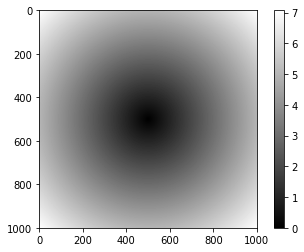

In [266]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

## Usage of np.where

In [268]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [269]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]

In [270]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [273]:
for x, y, c in zip(xarr, yarr, cond):
    print (x)
    print (y)
    print (c)

1.1
2.1
True
1.2
2.2
False
1.3
2.3
True
1.4
2.4
True
1.5
2.5
False


In [274]:
# Here in order for us to match the three arrays, we must use 
# at an array of booleans
result = np.where(cond, xarr, yarr)

In [275]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [276]:
arr_ = np.random.randn(4, 4)
arr_

array([[ 0.50544696, -0.13559696,  0.1734224 ,  0.45654582],
       [ 1.2308844 ,  1.70499042, -1.52448944,  0.79389414],
       [ 0.38005154, -0.50287979, -0.54034439,  1.89944921],
       [-0.33326494,  0.60092171, -0.55555117, -1.77230869]])

In [278]:
arr_ > 0

array([[ True, False,  True,  True],
       [ True,  True, False,  True],
       [ True, False, False,  True],
       [False,  True, False, False]])

In [280]:
# If the value is > 0, then x, esle y:
np.where(arr_>0, 2, -2)

array([[ 2, -2,  2,  2],
       [ 2,  2, -2,  2],
       [ 2, -2, -2,  2],
       [-2,  2, -2, -2]])

In [282]:
np.where(arr_>0, 2, arr_)

array([[ 2.        , -0.13559696,  2.        ,  2.        ],
       [ 2.        ,  2.        , -1.52448944,  2.        ],
       [ 2.        , -0.50287979, -0.54034439,  2.        ],
       [-0.33326494,  2.        , -0.55555117, -1.77230869]])

In [283]:
(arr_>0).sum()

9

## Linear Algebra

In [284]:
from numpy.linalg import inv, qr

In [285]:
X = np.random.randn(5, 5)

In [286]:
X

array([[-0.93673786,  0.15186857,  0.03866973,  0.19559798, -0.83083208],
       [ 1.13781117,  0.6885768 ,  0.82423704, -0.55771499,  1.35575666],
       [ 1.30132263, -1.29194986,  0.51545922, -3.25912472, -0.15589514],
       [-0.77913641,  1.56294505,  1.86537475, -1.05204647, -0.30598511],
       [ 1.52234783,  1.25737992,  0.60048948,  1.28209601,  1.48271745]])

In [287]:
mat = X.T.dot(X)

In [288]:
mat

array([[ 6.79012914, -0.34361206,  1.03315392, -2.28748735,  4.6136129 ],
       [-0.34361206,  6.19013802,  3.5779974 ,  3.82409227,  2.39487526],
       [ 1.03315392,  3.5779974 ,  4.78677082, -3.32464728,  1.32455854],
       [-2.28748735,  3.82409227, -3.32464728, 13.72177048,  1.81234351],
       [ 4.6136129 ,  2.39487526,  1.32455854,  1.81234351,  4.84473929]])

In [289]:
inv(mat)

array([[  161.15909047,   764.37957751,  -805.78233601,  -357.99954903,
         -177.09835552],
       [  764.37957751,  3665.6619356 , -3867.81182778, -1720.48590908,
         -838.86864555],
       [ -805.78233601, -3867.81182778,  4081.73076871,  1815.77816581,
          884.09081319],
       [ -357.99954903, -1720.48590908,  1815.77816581,   807.9460684 ,
          392.72292391],
       [ -177.09835552,  -838.86864555,   884.09081319,   392.72292391,
          194.90628579]])

In [291]:
inv?

## Random Walk

In [292]:
import random

In [320]:
x = random.randint(0, 1)
if x:
    print ("True,", "The value is:",x, ", Signal:", 1)
else:
    print (x)
    print ("False,", "The value is:",x, ", Signal:", -1)

0
False, The value is: 0 , Signal: -1


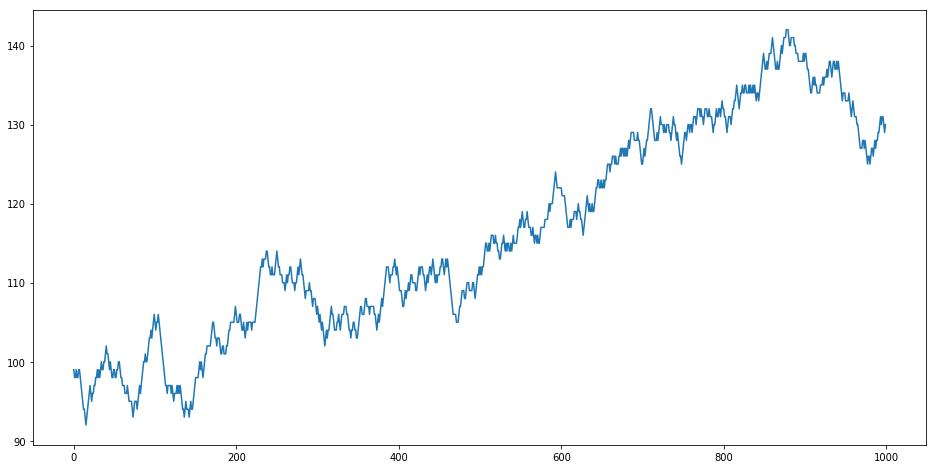

In [359]:
# The textbook actually uses random.randint(0, 1) to randomly
# generate 0 and 1, so I'd like to dig deeper into what it looks like: 

# Well I created one version my own:
init = 100
list_ = []
for i in range(1000):
    x = random.randint(-1, 1)
    x = init + x
    init = x
    list_.append(x)
    
pd.Series(list_).plot(figsize = (16, 8))

In [360]:
# Textbook version:

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

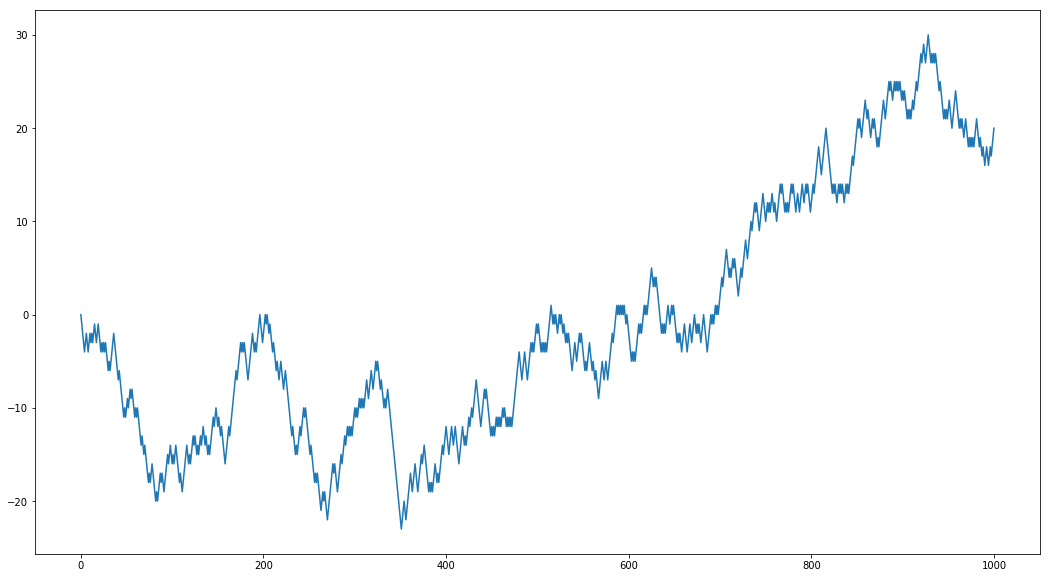

In [366]:
pd.Series(walk).plot(figsize = (18, 10))

In [381]:
nstep = 1000
draws = np.random.randint(0, 2, size=nstep)

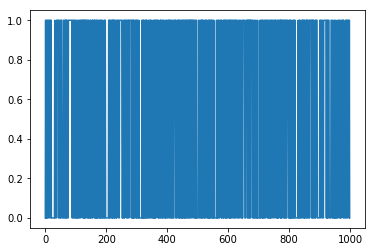

In [382]:
pd.Series(draws).plot()

In [383]:
steps = np.where(draws > 0, 1, -1)

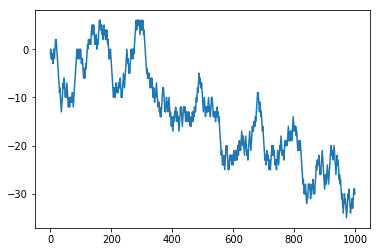

In [384]:
pd.Series(steps).cumsum().plot()

In [388]:
walk = np.array(walk)

In [396]:
np.random.randint(0, 2, size = (20, 10))

array([[0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

In [442]:
nwalks = 50
nsteps = 10
draws = np.random.randint(0, 2, size = (nwalks, nsteps))

In [443]:
draws.shape

(50, 10)

In [444]:
steps = np.where(draws>0, 1, -1)

In [445]:
steps

array([[ 1,  1,  1,  1, -1,  1, -1,  1,  1,  1],
       [ 1, -1, -1, -1,  1,  1,  1, -1,  1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1,  1, -1],
       [-1,  1, -1,  1,  1,  1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1,  1, -1,  1, -1, -1],
       [ 1,  1, -1, -1,  1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1,  1, -1, -1, -1, -1],
       [ 1,  1,  1,  1, -1, -1,  1,  1, -1,  1],
       [ 1,  1, -1,  1,  1,  1,  1,  1,  1, -1],
       [-1, -1,  1,  1, -1,  1,  1,  1, -1,  1],
       [ 1,  1, -1, -1,  1,  1, -1,  1,  1, -1],
       [ 1, -1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1, -1, -1,  1,  1,  1, -1, -1, -1,  1],
       [-1, -1, -1,  1,  1,  1, -1, -1,  1,  1],
       [-1,  1,  1,  1,  1, -1, -1,  1, -1, -1],
       [ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1],
       [ 1,  1,  1, -1,  1,  1, -1,  1, -1, -1],
       [ 1,  1, -1,  1,  1,  1, -1, -1, -1,  1],
       [-1, -1, -1, -1,  1,  1, -1,  1, -1, -1],
       [-1,  1, -1, 

In [446]:
walks = steps.cumsum(1)

In [447]:
walks

array([[ 1,  2,  3,  4,  3,  4,  3,  4,  5,  6],
       [ 1,  0, -1, -2, -1,  0,  1,  0,  1,  2],
       [ 1,  2,  3,  4,  3,  2,  1,  0,  1,  0],
       [-1,  0, -1,  0,  1,  2,  3,  4,  5,  4],
       [-1,  0,  1,  2,  3,  4,  3,  4,  3,  2],
       [ 1,  2,  1,  0,  1,  2,  1,  2,  1,  2],
       [ 1,  0,  1,  0,  1,  2,  1,  0, -1, -2],
       [ 1,  2,  3,  4,  3,  2,  3,  4,  3,  4],
       [ 1,  2,  1,  2,  3,  4,  5,  6,  7,  6],
       [-1, -2, -1,  0, -1,  0,  1,  2,  1,  2],
       [ 1,  2,  1,  0,  1,  2,  1,  2,  3,  2],
       [ 1,  0,  1,  2,  1,  0,  1,  2,  3,  2],
       [-1, -2, -3, -2, -1,  0, -1, -2, -3, -2],
       [-1, -2, -3, -2, -1,  0, -1, -2, -1,  0],
       [-1,  0,  1,  2,  3,  2,  1,  2,  1,  0],
       [ 1,  0,  1,  2,  3,  4,  3,  4,  3,  4],
       [ 1,  2,  1,  0, -1,  0,  1,  2,  3,  4],
       [ 1,  2,  3,  2,  3,  4,  3,  4,  3,  2],
       [ 1,  2,  1,  2,  3,  4,  3,  2,  1,  2],
       [-1, -2, -3, -4, -3, -2, -3, -2, -3, -4],
       [-1,  0, -1, 

In [431]:
walks[0, :]

array([  1,   2,   1,   2,   1,   0,   1,   0,   1,   2,   1,   0,   1,
         2,   3,   2,   1,   2,   3,   2,   1,   0,   1,   0,   1,   0,
        -1,   0,  -1,   0,  -1,   0,  -1,   0,  -1,  -2,  -3,  -2,  -3,
        -2,  -3,  -2,  -1,  -2,  -3,  -2,  -1,  -2,  -1,  -2,  -1,   0,
         1,   0,  -1,  -2,  -3,  -4,  -3,  -4,  -5,  -4,  -5,  -4,  -3,
        -2,  -1,  -2,  -1,  -2,  -1,  -2,  -1,  -2,  -1,  -2,  -3,  -2,
        -1,  -2,  -3,  -4,  -5,  -6,  -5,  -6,  -7,  -6,  -5,  -6,  -5,
        -6,  -7,  -6,  -5,  -6,  -7,  -6,  -7,  -8,  -9, -10,  -9,  -8,
        -9, -10,  -9,  -8,  -7,  -8,  -9, -10, -11, -10, -11, -12, -13,
       -12, -13, -14, -13, -14, -13, -12, -13, -12, -11, -10,  -9, -10,
        -9,  -8,  -7,  -6,  -5,  -6,  -5,  -6,  -7,  -6,  -7,  -8,  -7,
        -6,  -5,  -6,  -7,  -8,  -9,  -8,  -9, -10,  -9,  -8,  -9, -10,
        -9,  -8,  -9, -10,  -9, -10,  -9,  -8,  -9, -10,  -9, -10,  -9,
        -8,  -7,  -8,  -9, -10, -11, -10, -11, -10,  -9,  -8,  -

In [448]:
# Introduce a statistical term called "first crossing": 
# i.e. at which step the number crosses some certain threshold, e.g. 
# in this case, 30(I personally used 3 and 10 and 50 cuz everything
# will be much clearer after I reduced the numbers).

hits3 = (np.abs(walks) >=3).any(1)

In [451]:
# How many (or which, specifically) columns have values that reached 30:
hits3

array([ True, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False])

In [452]:
hits3.sum()

37

### Function of argmax()

In [455]:
crossing_times = (np.abs(walks[hits3]) >=3).argmax(1)

In [458]:
np.abs(walks[hits3]) >=3

array([[False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
        False],
       [False, False,  True,  True,  True, False,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False,  True, False, False, False, False, False,  True,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False,  True, 

In [461]:
(np.abs(walks[hits3]) >=3).shape

(37, 10)

In [456]:
# These numbers show at which number in each row the change of 
# boolean happens for the first time, meaning first cross 
# for the first time.

crossing_times

array([2, 2, 6, 4, 2, 4, 8, 8, 2, 2, 4, 4, 8, 2, 4, 2, 2, 6, 2, 4, 6, 4,
       4, 8, 6, 4, 4, 6, 8, 8, 4, 2, 8, 6, 2, 4, 2])

In [460]:
len(crossing_times)

37

In [459]:
crossing_times.mean()

4.4324324324324325

In [462]:
np.random.normal?